# Vectorize the Paragraph

In [8]:
import json
import csv
import urllib.request
from selenium.webdriver.firefox.options import Options
import pprint
import nltk.corpus
import random
import os
import gensim
import os
import shutil
import tensorflow as tf
import shutil
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display
import math 
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import nltk.corpus
import random
import os
import gensim
import json
import csv
import urllib.request
from sompy import SOMFactory
import random
import joblib
import glob
import matplotlib.pyplot as plt
import matplotlib
from sompy.visualization.plot_tools import plot_hex_map
import json
import csv
from gensim import corpora
from gensim import models
import os
import nltk
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

In [9]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dongchen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
file = 'CombinedBottomUp(1)(1).txt'
with open(file, 'r', encoding='utf-8') as f:
    combined_paragraphs = f.readlines()

In [12]:
stoplist = set('stopwords.txt'.split(' '))

# In the lecture I made an error here by combining these two lines, which added words 
#in a different form in a way they shouldn't

texts = [[word.replace(".","").replace(",","") for word in document.lower().split()] 
         for document in combined_paragraphs]

texts = [[word for word in text if (word not in stoplist and len(word)>2)] 
         for text in texts]

to_delete = []
for i in range(len(texts)):
    t = texts[i]
    test = [w for w in t if w.isalpha()]
    if len(test) < 20:
        to_delete.append(i)
    else:
        texts[i] = test

for i in sorted(to_delete, reverse = True):
    del texts[i]
    del combined_paragraphs[i]
    
# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 5] for text in texts]

In [13]:
processed_corpus

[['the',
  'unfolding',
  'effects',
  'the',
  'global',
  'economic',
  'recession',
  'are',
  'dramatically',
  'intensifying',
  'the',
  'contradictions',
  'around',
  'which',
  'urban',
  'social',
  'movements',
  'have',
  'been',
  'rallying',
  'suddenly',
  'their',
  'claims',
  'regarding',
  'the',
  'and',
  'neoliberal',
  'forms',
  'urbanization',
  'cities',
  'across',
  'europe',
  'from',
  'london',
  'copenhagen',
  'paris',
  'and',
  'rome',
  'athens',
  'and',
  'have',
  'erupted',
  'demonstrations',
  'strikes',
  'and',
  'protests',
  'often',
  'accompanied',
  'violence',
  'youthful',
  'activists',
  'are',
  'not',
  'alone',
  'their',
  'outrage',
  'that',
  'public',
  'money',
  'being',
  'out',
  'the',
  'banks',
  'even',
  'the',
  'economic',
  'life',
  'and',
  'the',
  'generalized',
  'social',
  'insecurity',
  'continues',
  'the',
  'economist',
  'intelligence',
  'unit',
  'offered',
  'the',
  'following',
  'incidents',
  '

In [14]:
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

adding document #0 to Dictionary<0 unique tokens: []>
adding document #10000 to Dictionary<10584 unique tokens: ['about', 'accompanied', 'across', 'activists', 'alone']...>
built Dictionary<10605 unique tokens: ['about', 'accompanied', 'across', 'activists', 'alone']...> from 10645 documents (total 830212 corpus positions)
starting a new internal lifecycle event log for Dictionary
Dictionary lifecycle event {'msg': "built Dictionary<10605 unique tokens: ['about', 'accompanied', 'across', 'activists', 'alone']...> from 10645 documents (total 830212 corpus positions)", 'datetime': '2023-05-02T18:03:44.949633', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


Dictionary<10605 unique tokens: ['about', 'accompanied', 'across', 'activists', 'alone']...>


In [15]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [16]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)

collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
starting a new internal lifecycle event log for TfidfModel
TfidfModel lifecycle event {'msg': 'calculated IDF weights for 10645 documents and 10605 features (613365 matrix non-zeros)', 'datetime': '2023-05-02T18:03:52.648798', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'initialize'}


In [17]:
# Use the model to convert each document to a vector representation
feature = []
for bow_doc in bow_corpus:
    tfidf_doc = tfidf[bow_doc]
    vec = gensim.matutils.sparse2full(tfidf_doc,len(dictionary))
    vec = np.array(vec)
    feature.append(vec)

In [18]:
feature1 = np.array(feature)

In [84]:

mapsize = [20, 20]  # define the size of the SOM map
# I changed the arguments according to this example: https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11
som = SOMFactory.build(feature1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

In [85]:
# I left this, but maybe experiment with a longer rough training length. At least for me that was still dropping after 20
som.train(n_job=1, verbose='info', train_rough_len=100, train_finetune_len=30)

 Training...
 pca_linear_initialization took: 1.719000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  1.106000, quantization error: 101.791440

 epoch: 2 ---> elapsed time:  1.736000, quantization error: 101.694154

 epoch: 3 ---> elapsed time:  1.635000, quantization error: 101.607360

 epoch: 4 ---> elapsed time:  1.623000, quantization error: 101.585484

 epoch: 5 ---> elapsed time:  1.610000, quantization error: 101.569081

 epoch: 6 ---> elapsed time:  1.916000, quantization error: 101.555944

 epoch: 7 ---> elapsed time:  1.887000, quantization error: 101.546552

 epoch: 8 ---> elapsed time:  1.644000, quantization error: 101.539734

 epoch: 9 ---> elapsed time:  1.596000, quantization error: 101.533860

 epoch: 10 ---> elapsed time:  1.542000, quantization error: 101.529052

 epoch: 11 ---> elapsed time:  1.536000, quantization error: 101.524935

 epoch: 12 ---> elapsed time:  1.855000, quantization error: 

 epoch: 11 ---> elapsed time:  1.751000, quantization error: 100.746098

 epoch: 12 ---> elapsed time:  1.718000, quantization error: 100.746098

 epoch: 13 ---> elapsed time:  1.707000, quantization error: 100.746098

 epoch: 14 ---> elapsed time:  1.654000, quantization error: 100.746098

 epoch: 15 ---> elapsed time:  1.626000, quantization error: 100.746098

 epoch: 16 ---> elapsed time:  1.606000, quantization error: 100.746098

 epoch: 17 ---> elapsed time:  1.668000, quantization error: 100.746098

 epoch: 18 ---> elapsed time:  1.650000, quantization error: 100.746098

 epoch: 19 ---> elapsed time:  1.640000, quantization error: 100.746098

 epoch: 20 ---> elapsed time:  1.717000, quantization error: 100.746098

 epoch: 21 ---> elapsed time:  1.804000, quantization error: 100.746098

 epoch: 22 ---> elapsed time:  1.667000, quantization error: 100.746098

 epoch: 23 ---> elapsed time:  1.609000, quantization error: 100.746098

 epoch: 24 ---> elapsed time:  1.682000, quantizati

# SOM Training method1

# SOM Training method2

# Find Best Matching Unit

In [24]:
print(feature1[8])

[0. 0. 0. ... 0. 0. 0.]


In [83]:
len(feature1)

10645

In [25]:
len(som.codebook.matrix[0])

10605

In [86]:
# however this built in function does seem to work. Here it gives an index (not the coordinates of the grid, but an)
# index of the cell for each of the given features. See Cai's lecture on how to deal with this from there, I remember
# she did mention some stuff about this.

bmus = som.project_data(feature1)


In [73]:
indexes = som.project_data(feature1)
indexes[0:100:1]

array([39,  7,  7, 16,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7, 17, 37, 18,
        7,  7,  6,  4,  7,  7,  7,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7, 16, 26, 26, 26, 17,  7, 17,  2, 46,  1,  5, 26, 16, 47,  5, 16,
       16, 37,  2,  0, 15, 25, 26,  0, 27, 26, 25, 25, 35, 25,  4,  4,  5,
       25, 36, 35, 36, 15, 25, 25, 26, 25, 26, 17, 25, 26, 15, 16])

TypeError: Invalid shape (1, 1, 10605) for image data

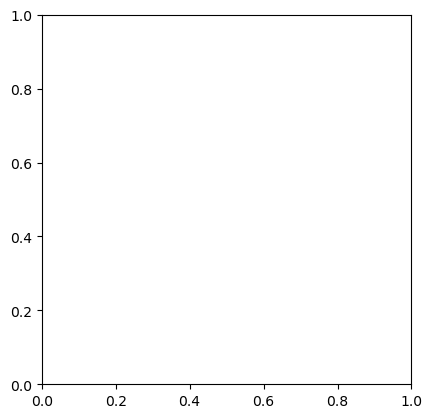

In [78]:
plt.imshow(feature1[0].reshape([1,1,10605]))

In [87]:
len(bmus)

10645

In [106]:
bmus

array([217,  14,  14, ..., 280, 280, 280])

In [19]:
for i in bmus:
    print(i)

39
7
7
16
6
8
7
8
8
8
8
8
8
8
17
37
8
8
7
6
2
7
8
8
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
7
8
8
16
26
26
26
17
7
17
2
46
1
5
26
6
47
5
6
16
37
1
0
26
25
26
0
37
16
25
25
35
15
14
3
5
15
36
26
26
15
25
15
26
25
26
17
25
16
15
16
17
26
16
15
17
17
6
17
16
6
16
4
16
8
57
7
26
66
36
36
36
26
16
4
7
7
17
15
28
39
39
2
8
17
16
26
7
6
6
16
26
25
6
15
27
36
16
17
17
17
16
17
26
7
16
28
15
8
17
8
16
26
17
27
9
6
7
26
7
5
15
4
1
5
6
6
15
5
5
17
17
6
16
18
17
17
27
2
5
7
16
17
17
17
27
17
25
39
47
27
27
27
27
46
6
13
16
7
7
6
17
4
39
39
5
39
7
39
2
7
4
6
5
6
17
49
5
4
25
7
49
14
6
7
14
36
27
26
15
13
5
15
15
39
16
27
6
27
3
6
7
22
6
17
7
7
7
26
28
8
7
36
47
18
16
59
37
3
39
24
25
67
59
36
2
46
38
57
57
27
37
7
63
37
17
36
7
7
7
7
7
17
7
7
7
7
9
37
7
7
36
27
8
7
8
7
7
7
8
7
8
7
7
7
8
7
8
7
8
8
9
8
8
7
7
7
27
7
8
8
7
8
36
7
17
26
46
27
8
35
7
8
16
8
8
8
7
8
7
17
8
35
8
8
8
8
8
8
8
8
27
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
16
8
8
7
6
7
27
8
36
45
26
15
3
7
5
3
4
3
3
4
3
1
3
3
2
3
2
2
2


9
9
9
9
9
29
68
9
19
19
29
29
29
29
39
29
19
9
19
16
19
9
9
19
19
36
9
9
9
9
9
9
19
9
9
9
9
16
9
9
9
9
9
9
9
9
9
9
9
8
9
9
9
9
19
9
19
19
38
9
9
9
9
9
9
9
9
57
48
49
58
28
49
39
59
69
59
38
38
58
26
26
39
49
47
59
39
49
39
59
49
57
47
28
69
69
69
59
49
69
39
28
28
69
48
39
39
39
49
49
59
49
49
49
48
49
49
49
49
38
49
39
37
39
48
49
48
39
47
49
49
59
48
39
59
39
39
49
49
49
49
39
38
39
39
49
49
49
49
49
39
49
49
49
39
49
49
49
49
39
49
59
39
59
49
38
49
48
59
49
59
57
58
49
49
48
69
59
49
39
39
39
39
67
57
68
69
79
39
39
38
69
48
39
49
59
38
39
38
39
29
39
26
47
48
49
59
59
48
49
69
48
59
69
48
78
59
39
69
49
38
39
39
79
56
38
47
58
48
37
69
79
69
59
39
69
69
49
69
69
69
69
69
69
69
69
48
69
69
69
58
39
69
69
68
79
69
79
69
79
79
79
69
69
59
69
69
69
69
79
69
69
79
79
69
79
69
79
69
49
48
48
69
29
39
39
38
49
69
69
68
69
69
69
68
69
49
59
49
59
59
49
39
69
48
39
38
38
49
39
58
57
38
48
48
37
59
74
39
49
48
49
39
49
58
57
48
39
49
49
48
59
49
49
49
59
49
59
59
39
39
49
47
49
49
49
49
49


55
65
30
34
80
30
30
66
65
46
80
40
30
90
13
30
35
30
40
40
30
56
30
20
91
55
30
55
80
20
75
45
90
55
80
80
55
80
45
20
20
33
80
80
20
11
10
90
90
30
33
30
30
30
30
30
30
70
80
70
65
31
55
75
65
54
35
20
34
23
46
30
57
90
66
75
10
66
30
55
20
10
36
36
30
33
45
24
30
47
36
56
35
30
46
56
56
46
65
45
35
0
56
56
30
30
45
55
55
84
0
11
22
0
71
66
90
20
46
2
90
55
65
10
90
30
60
33
31
91
90
70
70
33
32
33
11
30
2
21
22
20
30
22
30
30
30
75
0
80
80
80
54
70
70
80
10
66
22
26
0
80
60
65
80
80
80
94
76
80
71
70
90
10
20
80
80
80
90
94
30
20
80
70
20
40
10
67
90
30
20
70
70
90
80
40
80
80
70
20
80
80
80
90
90
90
80
80
81
80
0
0
12
40
20
40
40
45
40
40
34
83
76
40
81
30
56
75
31
30
55
30
30
30
20
20
65
33
22
70
40
30
30
40
30
31
93
55
90
31
91
30
30
21
30
93
90
93
93
30
91
92
92
40
91
90
30
30
0
30
25
34
30
30
30
30
30
30
90
30
30
44
30
40
30
30
30
30
30
30
31
30
30
30
30
30
30
30
30
65
50
90
90
90
30
30
90
20
70
90
40
30
30
30
90
90
70
80
30
30
20
90
30
90
90
30
30
30
1
30
22
90
90
20
91
92
81


In [118]:
bmus308 = []
for i in range(len(bmus)):
    if bmus[i] == 308:
        bmus308.append(i)
print(bmus308)

[4998, 5545, 5547, 5548, 5580, 5590, 5596, 5602, 5622, 5633, 5634, 5678, 5689, 5692, 5704, 5748, 5782, 6500, 6514, 6528, 6835, 6883, 9823, 10272, 10291, 10557]


In [119]:
for i in range(len(bmus308)):
    print(feature1[bmus308[i]])

[0. 0. 0. ... 0. 0. 0.]
[0.07541797 0.         0.         ... 0.         0.         0.        ]
[0.04092938 0.         0.07066074 ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.09958287 0.         0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.13314414 ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [110]:
len(feature1[170])

10605

In [91]:
featureTextIs = []
for i in range(len(feature)):
    featureText = {}
    featureText['sen'] = combined_paragraphs[i]
    featureText['vec'] = feature[i]
    featureTextIs.append(featureText)

In [92]:
my_dict = {d['sen']: d['vec'] for d in featureTextIs}

In [120]:
for key, value in my_dict.items():
    for i in range(len(bmus70)):
        
        if (value == feature[bmus308[i]]).all():
            print("-------------------------------"+" \n",key)

------------------------------- 
 P.M. Some 80 percent of the total hours of use will be concentrated in  these  two hours. In mid and late afternoon, use is again sporadic. If there's a special event, such as a jazz concert,  the flow  going home will be tapped,  with  people staying as late as 6:00 or 6:30 P.M. Ordinarily, however, plazas go dead by 6:00 and stay that way until the next morning.

------------------------------- 
 Third, storekeepers and other small businessmen are typically strong proponents of peace and order themselves; they hate broken windows and holdups; they hate having customers made nervous about safety. They are great street watchers and sidewalk guardians if present in sufficient numbers.

------------------------------- 
 It is just so on city streets elsewhere. A lively street always has both its users and pure watchers. Last year I was on such a street in the Lower East Side of Manhattan, waiting for a bus. I had not been there longer than a minute, bare

------------------------------- 
 He said that it disclosed the almost complete termination of new construction in the twenty-block area. He said it also showed a halt in the flow of bank and other institutional mortgage loans on real property, a turnover of property to a new type of investor, a growth of absentee ownership and the transformation of much of the housing occupancy in the area into furnished-room occupancy.

------------------------------- 
 For it was as if East Harlem, in effect, had been decreed a backward and deprived country, financially apart from our normal national life. Even the branch banks were closed down throughout an area of more than 100,000 people and thousands of businesses; merchants had to go out of the area simply to deposit their day’s receipts. Even the system of school savings accounts was removed from the district’s schools.

------------------------------- 
 The cataclysmic use of money for suburban sprawl, and the concomitant starvation of all th

In [57]:
# for one you have to wrap it in an array
bmu = som.project_data([feature1[888]])

In [107]:
import gensim
from gensim import corpora, models, similarities
import numpy as np

# Define the sentence to be vectorized
sentence = 'of all the ships in the sea sounding their horns at the same time as the city comes to a halt to salute the memory of Atatürk at 9:05 on the morning of November tenth; of a cobblestone staircase with so the morning of November tenth; of a cobblestone staircase with so much asphalt poured over it that its steps have disappeared; of marble ruins that were for centuries glorious street fountains but now stand dry, their faucets stolen; of the apartment buildings in the side streets where during my childhood middle-class families— of doctors, lawyers, teachers, and their wives and children—would sit in their apartments listening to the radio in the evenings, and where today the same apartments are packed with knitting and button machines and young girls working all night long for the lowest wages in the city to meet urgent orders; of the view of the Golden Horn, looking toward Eyüp from the Galata Bridge; of the simit vendors on the pier who gaze at the view as they wait for customers; of everything being broken, worn out, past its prime; of the storks 8ying south from the Balkans and northern and western Europe as autumn nears, gazing down over the entire city as they waft over the Bosphorus and the islands of the Sea of Marmara; of the crowds of men smoking cigarettes after the national soccer matches, which during my childhood never failed to end in abject defeat: I speak of them all'
# Preprocess the sentence using the same dictionary and tfidf model used in the code
bow_corpus = [dictionary.doc2bow(sentence.lower().split())]
tfidf_corpus = tfidf[bow_corpus]

# Convert the tfidf_corpus to a dense numpy array using the code
featurefif = []
for tfidf_doc in tfidf_corpus:
    vec = gensim.matutils.sparse2full(tfidf_doc, len(dictionary))
    vec = np.array(vec)
    featurefif.append(vec)

# Print the resulting feature vector
print(featurefif)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]


In [114]:
featurefif[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [116]:
bmu1 = som.project_data([featurefif[0]])

In [117]:
bmu1

array([308])

In [59]:

# And actually to find the xy 
# it seems to be with this:     bmu_ind_to_xy(self, bmu_ind):
xy = som.bmu_ind_to_xy(bmu)

In [60]:
# the first two in the resulting array are the xy coordinates, the 3rd is the index
xy

array([[ 9,  9, 99]])

In [70]:
bmu_indices = som.project_data([feature1[0]])   # Call project_data with a single-element list
bmu_index = bmu_indices[0]   # Extract the first (and only) element of the returned array
bmu_coord = som.bmu_ind_to_xy(np.array([bmu_index]))

In [71]:
bmu_coord

array([[ 3,  9, 39]])

In [72]:
bmu_coord

array([[ 3,  9, 39]])

In [46]:
bmu_index = np.ravel_multi_index(bmu_coord, som.codebook.mapsize)

In [47]:
bmu_weight = som.codebook.matrix[bmu_index, :]

In [49]:
if hasattr(som, 'norm_data'):
    original_data = bmu_weight * som.norm_data['normalization'][1] + som.norm_data['normalization'][0]
else:
    original_data = bmu_weight

In [50]:
original_data

array([-0.148631,  0.051644, -0.020396, ..., -0.031514, -0.020232,
       -0.015225])

# Find original data

In [55]:
featureTextIs = []
for i in range(len(feature)):
    featureText = {}
    featureText['sen'] = combined_paragraphs[i]
    featureText['vec'] = feature[i]
    featureTextIs.append(featureText)

In [56]:
featureTextIs

[{'sen': 'The unfolding effects of the global economic recession are dramatically intensifying the contradictions around which urban social movements have been rallying, suddenly validating their claims regarding the unsustainability and destructiveness of neoliberal forms of urbanization. Cities across Europe, from London, Copenhagen, Paris, and Rome to Athens, Reykjavik, Riga, and Kiev, have erupted in demonstrations, strikes, and protests, often accompanied by violence. Youthful activists are not alone in their outrage that public money is being doled out to the banks even as the destabilization of economic life and the intensification of generalized social insecurity continues. The Economist Intelligence Unit (2009) offered the following observation: “A spate of incidents in recent months shows that the global economic downturn is already having political repercussions … There is growing concern about a possible global pandemic of unrest … Our central forecast includes a high risk 

In [57]:
SOMtexts = []
for i in range(10):
    row = []
    for j in range(10):
        row.append([])
    SOMtexts.append(row)

# Visualisation

In [108]:
from sompy.visualization.mapview import View2D

In [109]:
data=bmu

In [110]:
import matplotlib.pyplot as plt
from sompy.visualization.hitmap import HitMapView

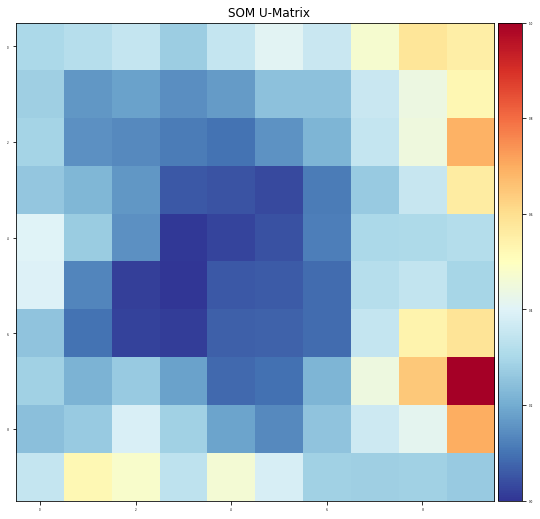

([],
 array([[3.81186969, 3.86887741, 3.94591422, 3.74019904, 3.94813251,
         4.10425195, 3.96466996, 4.27207667, 4.58070318, 4.49643502],
        [3.75054612, 3.43434135, 3.47961367, 3.39180624, 3.45113377,
         3.66948579, 3.66562382, 3.9701966 , 4.19395798, 4.43056722],
        [3.78636223, 3.39533152, 3.36883516, 3.30599322, 3.26235669,
         3.40457094, 3.59472306, 3.94417634, 4.20845224, 4.87000552],
        [3.70315195, 3.60192393, 3.43522246, 3.13803652, 3.11872727,
         3.07695968, 3.30124578, 3.71754386, 3.96050071, 4.51861184],
        [4.07965199, 3.72797887, 3.40027377, 3.00073235, 3.05341461,
         3.11277724, 3.31166562, 3.81357277, 3.82612902, 3.85388752],
        [4.07623099, 3.34910075, 3.035282  , 2.98705845, 3.14559719,
         3.15601821, 3.23259772, 3.87280055, 3.93412416, 3.79826332],
        [3.67427465, 3.26112429, 3.04055868, 3.02075953, 3.17291274,
         3.18807844, 3.22904543, 3.9486311 , 4.4536876 , 4.58677866],
        [3.75774261, 3

In [111]:
from sompy.visualization.umatrix import UMatrixView
umat = UMatrixView(width=20, height=20, title='SOM U-Matrix')

umat.show(som)

 a blue color might indicate a low distance or high similarity, while a red color might indicate a high distance or low similarity.
